<a href="https://colab.research.google.com/github/CivitCihan/ML_Classification/blob/main/RanForestClass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from google.colab import drive
import pandas as pd

# Google Drive'ı bağla
drive.mount('/content/drive')

# Dosyanın yolunu belirle
file_path = '/content/drive/My Drive/diabetes.csv'  # Dosyanın tam yolu

# Veriyi oku
df = pd.read_csv(file_path)
df = df.dropna()
df.head()

Mounted at /content/drive


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
y = df["Outcome"]
x = df.drop(["Outcome"], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

In [ ]:
ran_forest = RandomForestClassifier().fit(X_train, y_train)
y_pred = ran_forest.predict(X_test)
accuracy_score(y_pred, y_test)

0.7467532467532467

In [ ]:
ran_forest?

In [ ]:
ranForest_params = {
    "n_estimators": [100, 200, 500, 1000],
    "max_features": ["auto", "sqrt"],
    "criterion" : ["gini", "entropy", "log_loss"]
}

In [ ]:
ranForest_CV_model = GridSearchCV(ran_forest, ranForest_params, cv = 10, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits
[CV] END criterion=gini, max_features=auto, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_features=auto, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_features=auto, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_features=auto, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_features=auto, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_features=auto, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_features=auto, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_features=auto, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_features=auto, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_features=auto, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_features=auto, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_features=auto, n_

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
120 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/util

In [ ]:
ranForest_CV_model.best_params_

{'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 100}

In [ ]:
ranForest_tunned = RandomForestClassifier(criterion = "gini", max_features = "sqrt", n_estimators = 100).fit(X_train, y_train)
y_pred_tunned = ranForest_tunned.predict(X_test)
accuracy_score(y_pred_tunned, y_test)

0.7532467532467533

Variables importance levels

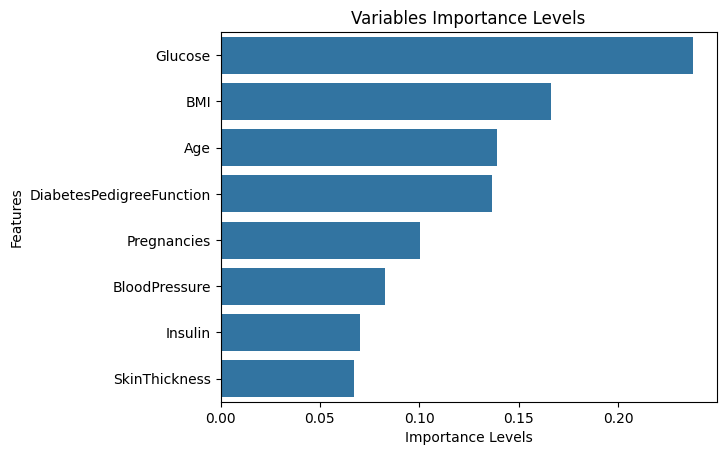

In [ ]:
feature_int = pd.Series(ranForest_tunned.feature_importances_, index = X_train.columns).sort_values(ascending = False)
sns.barplot(x = feature_int, y = feature_int.index)
plt.xlabel("Importance Levels")
plt.ylabel("Features")
plt.title("Variables Importance Levels")
plt.show()